In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from prediction_feature import implementations
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns

# Dataset Loading

In [3]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)
dataset = np.column_stack([iris_X, iris_y])
dataset = pd.DataFrame(dataset)
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)


# Exploratory Data Analysis

### 1. Missing values

In [4]:
if dataset.isnull().values.any():
    print('There are null values in the dataset!!!')
else:
    print('No null values in the dataset.')
missing_data = pd.DataFrame(dataset.isnull().sum(),columns=['Missing Values'])
print(missing_data)

No null values in the dataset.
   Missing Values
0               0
1               0
2               0
3               0
4               0


### 2. Distribution of data

Text(0.5, 0.98, 'Plot distribution of data')

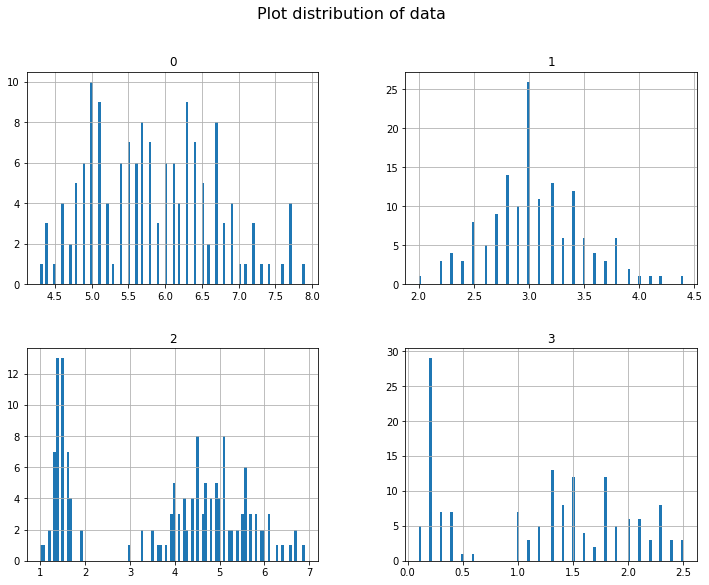

In [5]:
#check distribution of data
fig, axes = plt.subplots(len(dataset.columns)//2, 2, figsize=(12, 9))
i = 0
for triaxis in axes:
    for axis in triaxis:
        dataset.hist(column = dataset.columns[i], bins = 100, ax=axis)
        i = i+1
fig.suptitle('Plot distribution of data', fontsize=16)

### 3. Outliers detection

Text(0.5, 0.98, 'Boxplots for observing outliers')

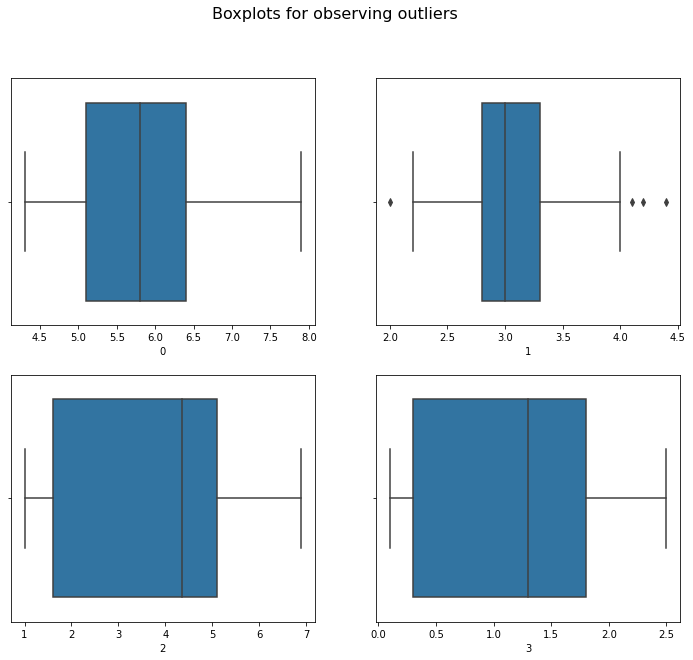

In [6]:
#plot boxplots for observing outliers
fig, axes = plt.subplots(len(dataset.columns)//2, 2, figsize=(12, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x=dataset[dataset.columns[i]], ax=axis)
        i = i+1
fig.suptitle('Boxplots for observing outliers', fontsize=16)

### 4. Removing outliers

In [7]:
print('Removing outliers...')
#remove outliers
alfa=0.2
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset < (Q1 - alfa * IQR)) |(dataset > (Q3 + alfa * IQR))).any(axis=1)]

Removing outliers...


### 5. Verify outliers removal

Text(0.5, 0.98, 'Plot boxplots for checking absence of outliers')

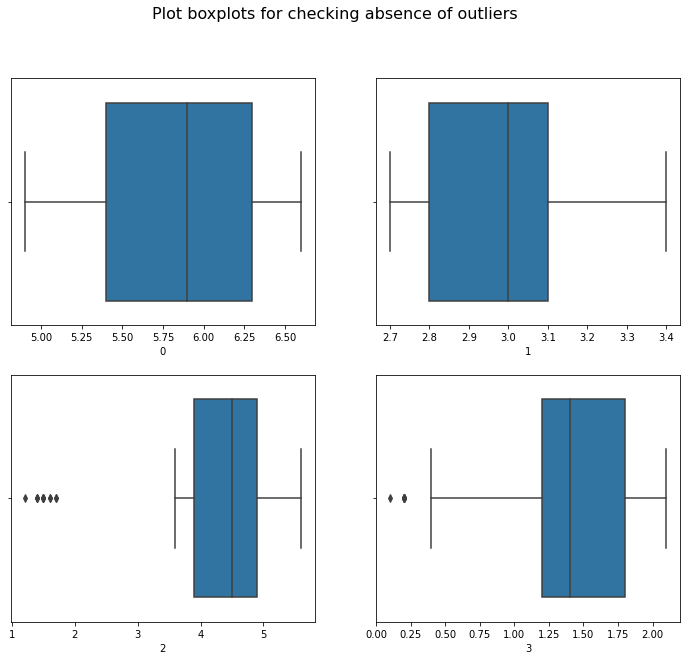

In [8]:
#plot boxplots for checking absence of outliers
fig, axes = plt.subplots(len(dataset.columns)//2, 2, figsize=(12, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x=dataset[dataset.columns[i]], ax=axis)
        i = i+1
fig.suptitle('Plot boxplots for checking absence of outliers', fontsize=16)

### 6. Distribution of data after removing outliers

Text(0.5, 0.98, 'Distribution of data after removing outliers')

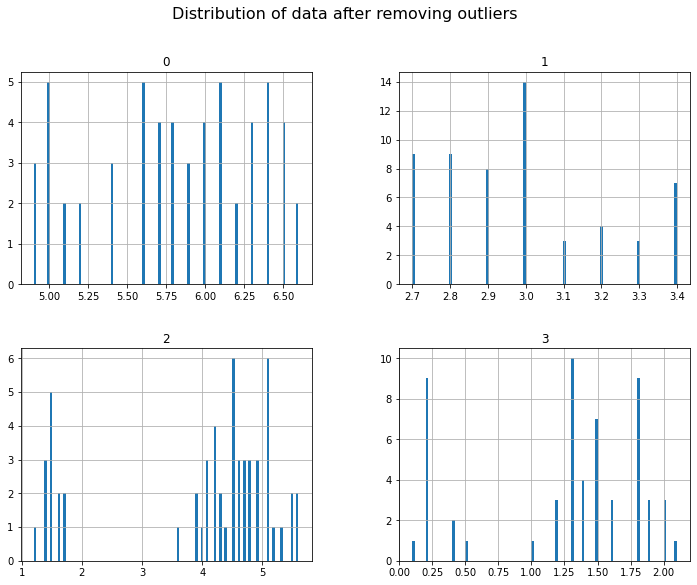

In [9]:
#check distribution of data
fig, axes = plt.subplots(len(dataset.columns)//2, 2, figsize=(12, 9))
i = 0
for triaxis in axes:
    for axis in triaxis:
        dataset.hist(column = dataset.columns[i], bins = 100, ax=axis)
        i = i+1
fig.suptitle('Distribution of data after removing outliers', fontsize=16)

Since:
1. We observe that the distribution of the V-x features are drastically changed.
2. The values we removed in all features as outliers have the same order of magnitude of the other values
3. The values we removed in all features as outliers can be considered important values for characterising the respective distribution.

We suppose it is better to use the dataset as it is loaded without removing this "outliers".

# Linear Regression

In [10]:
accuracy, consumption = implementations.linear_regression(X_train, X_test, y_train, y_test)

print(accuracy)
print(consumption)

CPU recognized: TDP set to 47
----------------LINEAR REGRESSION---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

0.98
3.603624979654948e-05


# Logistic Regression

In [11]:
accuracy, consumption = implementations.logistic_regression(X_train, X_test, y_train, y_test)

print(accuracy)
print(consumption)

CPU recognized: TDP set to 47
----------------LOGISTIC REGRESSION---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0
0.000221632080078125


# Random Forest

In [12]:
accuracy, consumption = implementations.random_forest(X_train, X_test, y_train, y_test)

print(accuracy)
print(consumption)

CPU recognized: TDP set to 47
----------------RANDOM FOREST---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

0.98
0.00039245196024576825


# STD Neural Network

In [13]:
accuracy, consumption = implementations.standard_neural_network(x_training_set=X_train, x_test_set=X_test, y_training_set=y_train, y_test_set=y_test,  hidden_layer_size=(30, 30))

print(accuracy)
print(consumption)

CPU recognized: TDP set to 47
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

0.98
0.0003399317169189453


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AutoSKLearn

In [14]:
from supervised import AutoML

automl = AutoML(algorithms=['Linear', 'Random Forest', 'Decision Tree', 'Neural Network'], eval_metric='accuracy', top_models_to_improve=4, explain_level=1)
automl.fit(X_train, y_train)

AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric accuracy
AutoML will use algorithms: ['Linear', 'Random Forest', 'Decision Tree', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree accuracy 0.96 trained in 8.95 seconds
2_Linear accuracy 0.96 trained in 4.01 seconds
* Step default_algorithms will try to check up to 2 models
3_Default_NeuralNetwork accuracy 0.84 trained in 0.46 seconds
4_Default_RandomForest accuracy 0.96 trained in 0.76 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.96 trained in 0.16 seconds
AutoML fit time: 21.08 seconds
AutoML best model: 1_DecisionTree


AutoML(algorithms=['Linear', 'Random Forest', 'Decision Tree',
                   'Neural Network'],
       eval_metric='accuracy', explain_level=1, top_models_to_improve=4)

In [15]:
from sklearn.metrics import accuracy_score

predictions = automl.predict_all(X_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions["label"].astype(int)))

   prediction_0  prediction_1  prediction_2  label
0           0.0           1.0           0.0      1
1           1.0           0.0           0.0      0
2           0.0           0.0           1.0      2
3           0.0           1.0           0.0      1
4           0.0           1.0           0.0      1
Test accuracy: 1.0
